# Integrantes
- Aguilar Martínez Erick Yair
- Martínez Muñoz Alan Magno
- Mendoza Hernández Carlos Emiliano

Implementar *desde cero* el algoritmo *k*-vecinos mas próximos convencional con la medida de distancia euclideana y *city-block*

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

In [5]:
class KVecinos():
    """
    Implementacion del algoritmo de kvecinos mas cercanos. En particulal, se implementa el algoritmo de clasificacion de kvecinos mas cercanos con 2 metricas de distancia: euclidean y city-block.
    """
    def __distancia(self, x1, x2):
        """
        Calcula la distancia entre dos puntos x1 y x2
        """
        if self.dist == 'euclidean':
            return np.linalg.norm(x1 - x2)
        elif self.dist == 'city-block':
            return np.sum(np.abs(x1 - x2))
        return np.linalg.norm(x1 - x2)
    def __init__(self, k, dist = 'euclidean'):
        """
        Constructor de la clase
        """
        self.dist = dist
        self.k = k
    def fit(self, X, y):
        """
        "Entrena el modelo" pues recordemos que el algoritmos se le considera
        un algoritmo perezoso
        """
        self.X = X
        self.y = y
    def predict(self, x0):
        """
        Predice la clase de un punto x0
        """
        dists = np.array([self.__distancia(x0, x) for x in self.X])
        idx = np.argsort(dists)
        k_nearest = self.y[idx[:self.k]]
        return np.bincount(k_nearest).argmax(), self.X[idx[:self.k]]

conjunto de datos con tallas visto en clase

In [6]:
df = pd.read_csv('tallas.csv')
talla_map = {'L': 1, 'M':0}
df['talla'] = df['talla'].map(talla_map)
df.head()

,altura,peso,talla
0,170,64,1
1,168,62,1
2,163,60,0
3,168,63,1
4,158,63,0


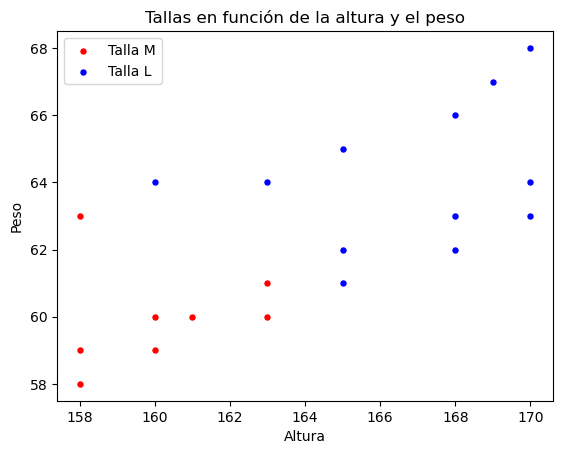

In [7]:
X, y = df[['altura', 'peso']].values, df['talla'].values
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Talla M',s=13)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Talla L',s=13)
plt.legend()
plt.title('Tallas en función de la altura y el peso')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.show()

In [8]:
def show_closest_points(punto, cercanos):
    """
    Este codigo lo implementamos en clase y sirve
    para visualizar los k puntos mas cercanos a un punto
    mediante lineas. Solo para dos dimensiones
    """
    for c in cercanos:
        plt.plot([punto[0], c[0]], [punto[1], c[1]])

# Visualización de las datos considerados para las predicciones

## Conjunto de tallas

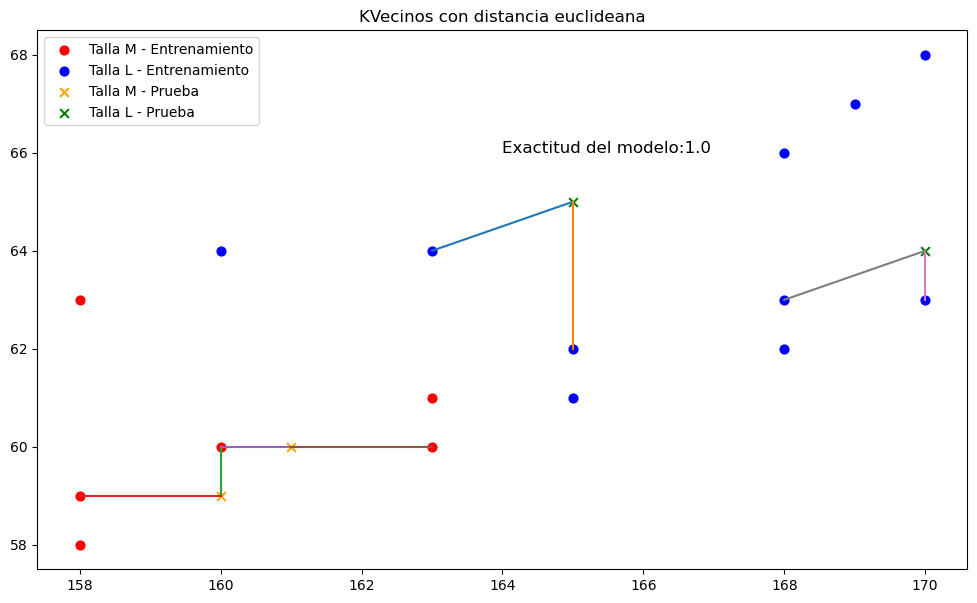

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)
knn = KVecinos(k=2)
knn.fit(X_train, y_train)
plt.figure(figsize=(12, 7))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Talla M - Entrenamiento',s=40)
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Talla L - Entrenamiento',s=40)
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='orange', label='Talla M - Prueba',s=40, marker='x')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='green', label='Talla L - Prueba',s=40, marker='x')
plt.legend()
par_etiqueta_vectores = [knn.predict(x) for x in X_test]
y_pred = [x[0] for x in par_etiqueta_vectores]
for i in range(len(X_test)):
    show_closest_points(X_test[i], par_etiqueta_vectores[i][1])
plt.title('KVecinos con distancia euclideana')
plt.text(164,66,'Exactitud del modelo:' + str(accuracy_score(y_test,y_pred)), fontsize=12)
plt.show()

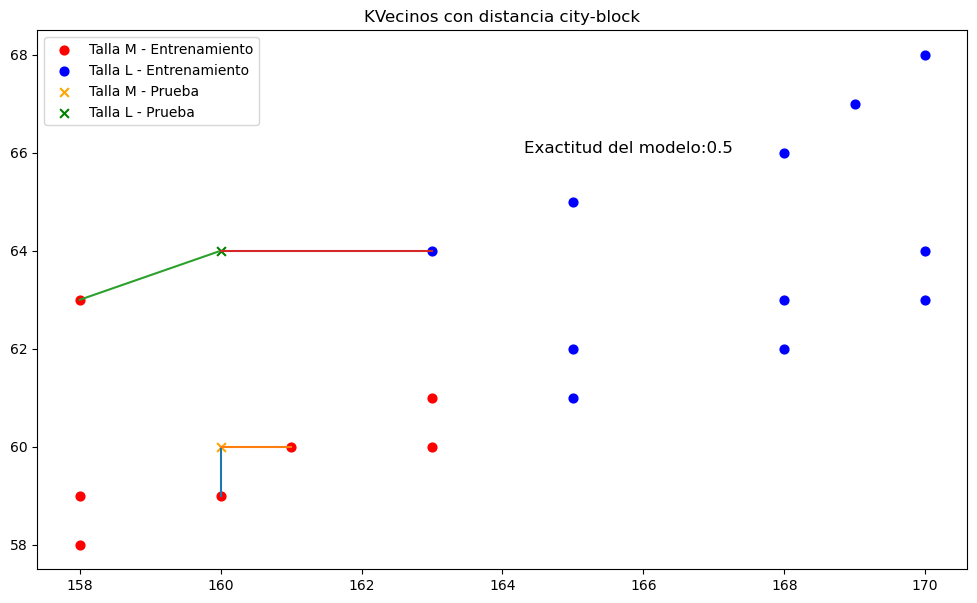

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4, stratify=y)
knn = KVecinos(k=2,dist='city-block')
knn.fit(X_train, y_train)
plt.figure(figsize=(12, 7))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Talla M - Entrenamiento',s=40)
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Talla L - Entrenamiento',s=40)
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='orange', label='Talla M - Prueba',s=40, marker='x')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='green', label='Talla L - Prueba',s=40, marker='x')
plt.legend()
par_etiqueta_vectores = [knn.predict(x) for x in X_test]

for i in range(len(X_test)):
    show_closest_points(X_test[i], par_etiqueta_vectores[i][1])
y_pred = [x[0] for x in par_etiqueta_vectores]
plt.title('KVecinos con distancia city-block')
plt.text(164.3,66,'Exactitud del modelo:' + str(accuracy_score(y_test,y_pred)), fontsize=12)
plt.show()


# Conjunto Iris

In [11]:
from sklearn.decomposition import PCA
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.03, random_state=10,stratify=y)

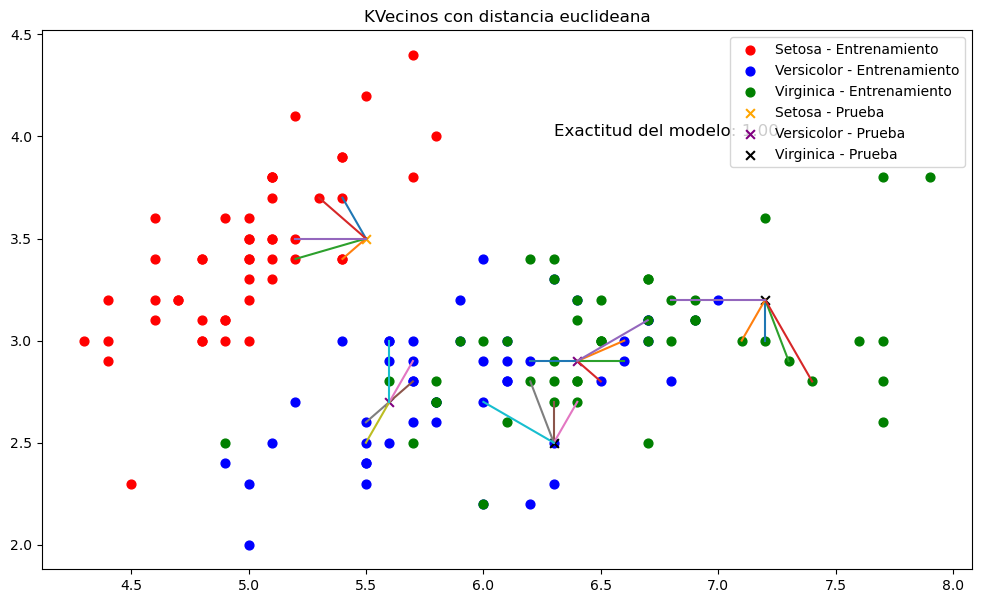

In [12]:
knn = KVecinos(k=5)
knn.fit(X_train, y_train)
plt.figure(figsize=(12, 7))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Setosa - Entrenamiento',s=40)
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Versicolor - Entrenamiento',s=40)
plt.scatter(X_train[y_train == 2][:, 0], X_train[y_train == 2][:, 1], color='green', label='Virginica - Entrenamiento',s=40)
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='orange', label='Setosa - Prueba',s=40, marker='x')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='purple', label='Versicolor - Prueba',s=40, marker='x')
plt.scatter(X_test[y_test == 2][:, 0], X_test[y_test == 2][:, 1], color='black', label='Virginica - Prueba',s=40, marker='x')
plt.legend()
plt.title('KVecinos con distancia euclideana')
par_etiqueta_vectores = [knn.predict(x) for x in X_test]
for i in range(len(X_test)):
    show_closest_points(X_test[i], par_etiqueta_vectores[i][1])
y_pred = [knn.predict(x)[0] for x in X_test]
plt.text(6.3,4,'Exactitud del modelo: {:.2f}'.format(accuracy_score(y_test, y_pred)), fontsize=12)
plt.show()

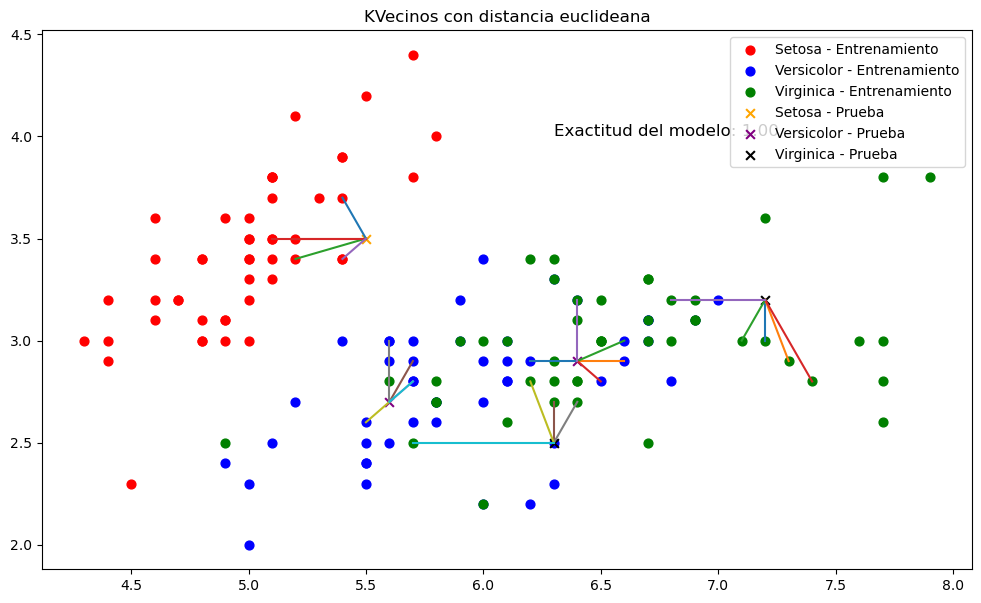

In [13]:
knn = KVecinos(k=5,dist='city-block')
knn.fit(X_train, y_train)
plt.figure(figsize=(12, 7))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Setosa - Entrenamiento',s=40)
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Versicolor - Entrenamiento',s=40)
plt.scatter(X_train[y_train == 2][:, 0], X_train[y_train == 2][:, 1], color='green', label='Virginica - Entrenamiento',s=40)
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='orange', label='Setosa - Prueba',s=40, marker='x')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='purple', label='Versicolor - Prueba',s=40, marker='x')
plt.scatter(X_test[y_test == 2][:, 0], X_test[y_test == 2][:, 1], color='black', label='Virginica - Prueba',s=40, marker='x')
plt.legend()
plt.title('KVecinos con distancia euclideana')
par_etiqueta_vectores = [knn.predict(x) for x in X_test]
for i in range(len(X_test)):
    show_closest_points(X_test[i], par_etiqueta_vectores[i][1])
y_pred = [knn.predict(x)[0] for x in X_test]
plt.text(6.3,4,'Exactitud del modelo: {:.2f}'.format(accuracy_score(y_test, y_pred)), fontsize=12)
plt.show()